# JFK Clase

## Shortcuts



*   command MM: pasar la celda a texto
*   command + MY: pasar la celda a código
*   command + M (A/B): generar una nueva celda A (Above), B(Below)
*   Alt + intro: ejecuta celda y crea una nueva
*   command + intro: ejecuta codigo







## Importación libreria

In [ ]:
import numpy as np
import pandas as pd

#visualizacion

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from sklearn import preprocessing

## Importación de datos

In [ ]:
url1 = 'https://bit.ly/3bf6QNP'
url2 = 'https://bit.ly/3kLR2p3'

In [ ]:
url_weather = 'https://raw.githubusercontent.com/Sitg35/Binary-Classifier-JFK/refs/heads/main/NYC_Weather_2016_2022.csv'

In [ ]:
pd.read_csv?

In [ ]:
df1 = pd.read_csv(url1, index_col = 0)

In [ ]:
df1

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0
1,2018-02-01,20363.0,N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.0,1541,0.0,107.0,427.0
2,2018-02-01,20363.0,N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.0,1709,0.0,100.0,301.0
3,2018-02-01,20363.0,N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.0,1845,0.0,101.0,290.0
4,2018-02-01,20363.0,N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.0,1454,0.0,89.0,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2019-08-23,20363.0,N8974C,RIC,"Richmond, VA",Virginia,JFK,"New York, NY",New York,725,14.0,900,0.0,95.0,288.0
99996,2019-08-23,20363.0,N932XJ,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1000,NaN,1130,0.0,90.0,340.0
99997,2019-08-23,NaN,N836AY,RIC,"Richmond, VA",Virginia,JFK,"New York, NY",New York,1147,NaN,1313,0.0,86.0,288.0
99998,2019-08-23,20363.0,N836AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,735,12.0,900,0.0,85.0,290.0


In [ ]:
df2 = pd.read_csv(url2, index_col = 0)

In [ ]:
df2.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
100000,2019-08-23,20363.0,N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.0,2145,0.0,143.0,665.0


In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0
1,2018-02-01,20363.0,N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.0,1541,0.0,107.0,427.0
2,2018-02-01,20363.0,N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.0,1709,0.0,100.0,301.0
3,2018-02-01,20363.0,N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.0,1845,0.0,101.0,290.0
4,2018-02-01,20363.0,N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.0,1454,0.0,89.0,187.0


In [ ]:
df.reset_index(drop = True, inplace = True)

### Importe datos tiempo

In [ ]:
df_weather = pd.read_csv(url_weather)

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59760 entries, 0 to 59759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   59760 non-null  object 
 1   temperature_2m (°C)    59592 non-null  float64
 2   precipitation (mm)     59592 non-null  float64
 3   rain (mm)              59592 non-null  float64
 4   cloudcover (%)         59592 non-null  float64
 5   cloudcover_low (%)     59592 non-null  float64
 6   cloudcover_mid (%)     59592 non-null  float64
 7   cloudcover_high (%)    59592 non-null  float64
 8   windspeed_10m (km/h)   59592 non-null  float64
 9   winddirection_10m (°)  59587 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.6+ MB


In [ ]:
df_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


El join de datos sera por fecha exacta sin HH:MM
El time lo tiene que leer como datetime

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['time'])

In [ ]:
df_weather.set_index('time', inplace = True)

In [ ]:
df_weather.head(1)

,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
time,,,,,,,,,
2016-01-01,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0


In [ ]:
df_weather = df_weather.resample('D').mean()

In [ ]:
df_weather = df_weather[(df_weather.index<=max(df['FL_DATE'])) & (df_weather.index>=min(df['FL_DATE'])) ]

In [ ]:
min(df['FL_DATE'])

Timestamp('2018-01-01 00:00:00')

In [ ]:
df_weather.columns = ['temperature_2m', 'precipitation', 'rain',
       'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'winddirection_10m']

In [ ]:
df_weather['FL_DATE'] = df_weather.index

In [ ]:
df_weather.head(1)

,temperature_2m,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,FL_DATE
time,,,,,,,,,,
2018-01-01,-11.283333,0.0,0.0,2.625,2.583333,0.5,0.0,13.3,303.791667,2018-01-01


In [ ]:
df = df.join(df_weather, on = 'FL_DATE', how = 'left' , rsuffix = '_w' )

In [ ]:
df.shape

(250152, 25)

In [ ]:
df.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,...,temperature_2m,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,FL_DATE_w
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,...,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667,2018-02-01
1,2018-02-01,20363.0,N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,...,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667,2018-02-01
2,2018-02-01,20363.0,N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,...,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667,2018-02-01
3,2018-02-01,20363.0,N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,...,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667,2018-02-01
4,2018-02-01,20363.0,N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,...,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667,2018-02-01


In [ ]:
df.drop('FL_DATE_w', axis = 1, inplace = True)

## Data Understanding

Objetivo del data understanding:



*   Entender la distribución de los datos para el Data Preparation (necesito todo númerico)
*   Análisis de datos clásico: entender cómo los predictores se relacionan con el target



### Tamaño del dataset

In [ ]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                250152 non-null  datetime64[ns]
 1   OP_CARRIER_AIRLINE_ID  237644 non-null  float64       
 2   TAIL_NUM               235143 non-null  object        
 3   ORIGIN                 250152 non-null  object        
 4   ORIGIN_CITY_NAME       250152 non-null  object        
 5   ORIGIN_STATE_NM        250152 non-null  object        
 6   DEST                   250152 non-null  object        
 7   DEST_CITY_NAME         250152 non-null  object        
 8   DEST_STATE_NM          250152 non-null  object        
 9   CRS_DEP_TIME           250152 non-null  int64         
 10  TAXI_OUT               232641 non-null  float64       
 11  CRS_ARR_TIME           250152 non-null  int64         
 12  ARR_DEL15              250152 non-null  floa


Número de filas: 250k
tipos de variables:



Numerico

*   Boolean: true/false
*   Integers : enteros
*   Floats: decimales


Categoricas

*   Categoricals
*   Object
*   String








## Visualización datos

In [ ]:
df.head().T

,0,1,2,3,4
FL_DATE,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00
OP_CARRIER_AIRLINE_ID,20363.0,20363.0,20363.0,20363.0,20363.0
TAIL_NUM,N299PQ,N920XJ,N605LR,N800AY,N600LR
ORIGIN,BNA,RDU,BUF,ORF,BOS
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY","Norfolk, VA","Boston, MA"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York,Virginia,Massachusetts
DEST,JFK,JFK,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529,1704,1325




*   FL_DATE: fecha del vuelo
*   OP_CARRIER_AIRLINE_ID: identificador de aerolinea
*   TAIL_NUM: matricula avión
*   ORIGIN: aeropuerto/ciudad/estado de origen
*   DEST: aeropuerto/ciudad/estado de destino, siempre JFK Nueva York
*   CRS_DEP_TIME: hora prevista de salida
*   TAXI_OUT: tiempo en pista antes del despegue
*   CRS_ARR_TIME: hora prevista de llegada
*   **ARR_DEL15: target** , indicador de si el vuelo se ha retrasado mas de 15 minutos
*   CRS_ELAPSED_TIME: tiempo estimado de vuelo
*   distance













## Estadisticos descriptivos

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
FL_DATE,250152,2019-01-01 08:55:24.724167424,2018-01-01 00:00:00,2018-07-06 00:00:00,2018-12-30 00:00:00,2019-06-30 00:00:00,2019-12-31 00:00:00,NaN
OP_CARRIER_AIRLINE_ID,237644.0,20152.000736,19690.0,19790.0,20363.0,20409.0,21171.0,297.881929
CRS_DEP_TIME,250152.0,1334.611164,3.0,915.0,1258.0,1744.0,2359.0,529.100385
TAXI_OUT,232641.0,18.18982,1.0,12.0,16.0,21.0,166.0,9.609596
CRS_ARR_TIME,250152.0,1419.131404,1.0,944.0,1455.0,1914.0,2400.0,580.986009
ARR_DEL15,250152.0,0.2104,0.0,0.0,0.0,0.0,1.0,0.407594
CRS_ELAPSED_TIME,250152.0,195.647706,47.0,109.0,167.0,306.0,595.0,97.374339
DISTANCE,250152.0,1258.844866,94.0,427.0,1028.0,2248.0,4983.0,898.116163
temperature_2m,250152.0,12.995712,-13.854167,4.479167,13.445833,22.0125,31.325,9.715742
precipitation,250152.0,0.145934,0.0,0.0,0.004167,0.154167,2.3875,0.294823


Importante:



*   **Hay nulos:** total filas 250k -> conteo < 250k
*   Distribución tiene sentido: valores incorrectos o outliers
*   Cambio de tipo de variable
*   **Distribución del target**: 21% se retrasan





In [ ]:
df.describe(include = ['object']).T

,count,unique,top,freq
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152




*   Variables sin varianza: categoricas si tienen unique = 1, std = 0



## Numero de nulos

In [ ]:
df.select_dtypes(include = ['number']).isnull().sum()

,0
OP_CARRIER_AIRLINE_ID,12508
CRS_DEP_TIME,0
TAXI_OUT,17511
CRS_ARR_TIME,0
ARR_DEL15,0
CRS_ELAPSED_TIME,0
DISTANCE,0
temperature_2m,0
precipitation,0
rain,0


In [ ]:
df.select_dtypes(include = ['object']).isnull().sum()

,0
TAIL_NUM,15009
ORIGIN,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_NM,0
DEST,0
DEST_CITY_NAME,0
DEST_STATE_NM,0


## Exploracion variables: analisis de datos

#### Fechas

In [ ]:
LAX_df = df[df['ORIGIN']=='LAX']

In [ ]:
LAX_df.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,...,DISTANCE,temperature_2m,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m
34,2018-02-01,19805.0,N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,...,2475.0,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667
35,2018-02-01,19805.0,N117AN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1045,...,2475.0,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667
36,2018-02-01,19805.0,N111ZM,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1630,...,2475.0,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667
39,2018-02-01,19805.0,N101NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1245,...,2475.0,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667
100,2018-02-01,19790.0,NaN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1130,...,2475.0,1.116667,0.0,0.0,69.583333,0.125,68.208333,94.875,10.541667,200.666667


In [ ]:
LAX_df_dia = LAX_df[['FL_DATE', 'ARR_DEL15']].groupby(['FL_DATE']).mean()

Revisamos:



*   Todos los dias hay retrasos
*   Ideas: hay que revisar dia de la semana
*   lectura: el 1 de Enero de 2018 hubo un total de 32,25% de los vuelos que se retrasaron
*   Veo variabilidad: muy bueno









In [ ]:
LAX_df_dia.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='FL_DATE', length=730, freq=None)

In [ ]:
LAX_df_dia.index = pd.to_datetime(LAX_df_dia.index)

<Axes: xlabel='FL_DATE'>

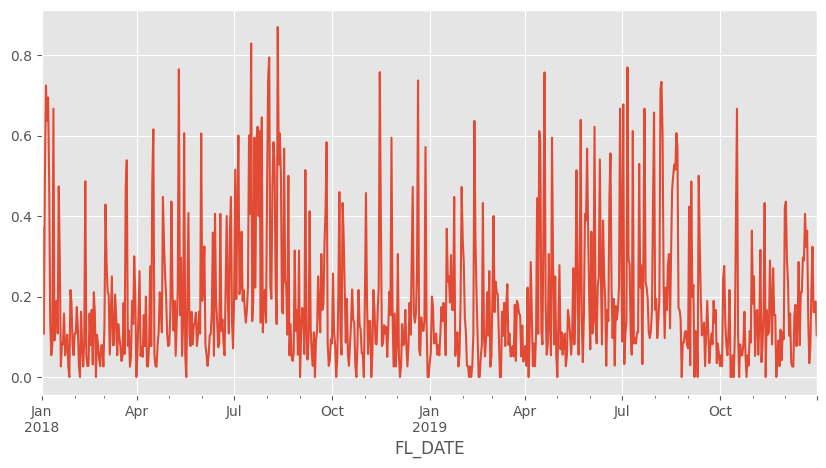

In [ ]:
plt.figure(figsize = [10,5])
LAX_df_dia['ARR_DEL15'].plot()

In [ ]:
media_semanal_lax = LAX_df_dia['ARR_DEL15'].resample('W').mean()

<Axes: xlabel='FL_DATE'>

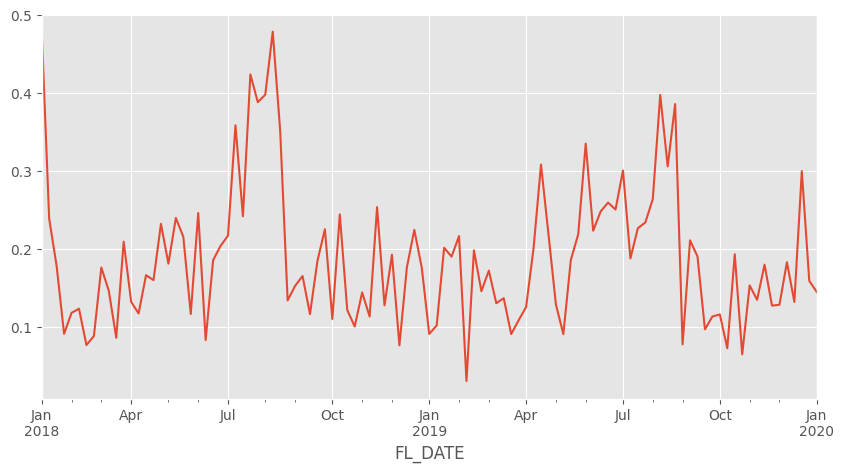

In [ ]:
plt.figure(figsize = [10,5])
media_semanal_lax.plot()

fechas revisad si hay


1.   Tendencia
2.   Ciclo



### Numericas

<Axes: xlabel='ARR_DEL15', ylabel='rain'>

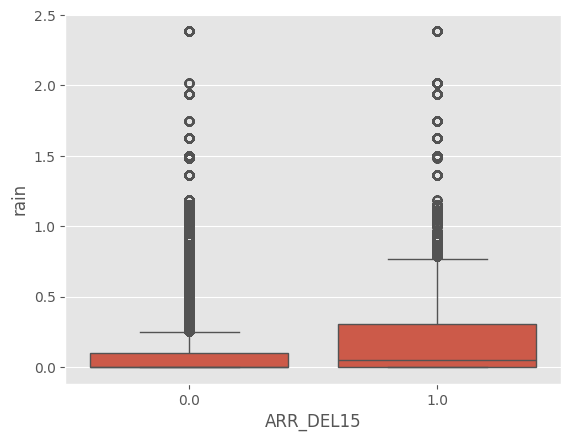

In [ ]:
sns.boxplot(data= df, x= 'ARR_DEL15', y = 'rain' )

Parece que si hay lluvia hay mas probabilidad de retraso en el vuelo

### Categoricas

In [ ]:
df.pivot_table(index='ORIGIN_CITY_NAME', values = 'ARR_DEL15', aggfunc = [len, sum, np.mean]).sort_values(by = [('mean','ARR_DEL15')], ascending = False)

<ipython-input-54-8c9452013c89>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index='ORIGIN_CITY_NAME', values = 'ARR_DEL15', aggfunc = [len, sum, np.mean]).sort_values(by = [('mean','ARR_DEL15')], ascending = False)
<ipython-input-54-8c9452013c89>:1: FutureWarning: The provided callable <function mean at 0x7a8ea0df95a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index='ORIGIN_CITY_NAME', values = 'ARR_DEL15', aggfunc = [len, sum, np.mean]).sort_values(by = [('mean','ARR_DEL15')], ascending = False)


,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN_CITY_NAME,,,
"Houston, TX",840,260.0,0.309524
"Chicago, IL",5647,1705.0,0.301930
"Honolulu, HI",754,222.0,0.294430
"Nantucket, MA",919,263.0,0.286181
"Eagle, CO",161,46.0,0.285714
...,...,...,...
"Bangor, ME",442,67.0,0.151584
"Sacramento, CA",684,101.0,0.147661


En Aguadilla han salido un total de 858 vuelos en direccion JFK. De estos, 200 tenian retraso, lo que significa que el 23,31% se retrasaron.

## Data Preparation

### Ajuste de tipos

In [ ]:
df['AEROLINEA'] = df['OP_CARRIER_AIRLINE_ID'].astype(object)

In [ ]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
AEROLINEA,237644.0,11.0,20409.0,78587.0


In [ ]:
df.drop('OP_CARRIER_AIRLINE_ID', axis = 1, inplace = True)

### Imputacion de nulos

### Categoricas

In [ ]:
df.select_dtypes(include = ['object']).isnull().sum()

,0
TAIL_NUM,15009
ORIGIN,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_NM,0
DEST,0
DEST_CITY_NAME,0
DEST_STATE_NM,0
AEROLINEA,12508


Como voy a utilizar un algoritmo simbolista, puede meter un valor fuera de rango

In [ ]:
df['AEROLINEA'].fillna('ZZZ', inplace = True)

<ipython-input-63-12840638eab9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AEROLINEA'].fillna('ZZZ', inplace = True)


In [ ]:
df['TAIL_NUM'].value_counts()

,count
TAIL_NUM,
N110AN,761
N113AN,751
N111ZM,748
N115NN,740
N109NN,740
...,...
N197UW,1
N986AN,1
N315RJ,1


In [ ]:
df['TAIL_NUM'].fillna('ZZZ', inplace = True)

<ipython-input-65-7439d026c5a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TAIL_NUM'].fillna('ZZZ', inplace = True)
